# Description
Craigslist is the world's largest collection of used vehicles for sale,this dataset which includes every used vehicle entry within the United States on Craigslist.

# Importing Libraries


In [3]:
import numpy as np

In [4]:
import pandas as pd 

# Reading Data


In [5]:
df = pd.read_csv("D:/Github-Projects/vehicles.csv")

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [7]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [8]:
df.shape

(423857, 25)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

# Data cleaning 


In [10]:
r=df.columns
for i in r:
    print(df[i].value_counts())

id
7184791621    1
7194329361    1
7194912790    1
7185506469    1
7185509110    1
             ..
7196664431    1
7196664662    1
7196665504    1
7196665569    1
7195109037    1
Name: count, Length: 423857, dtype: int64
url
https://duluth.craigslist.org/ctd/d/duluth-2000-gmc-new-sierra-1500-ext-cab/7184791621.html           1
https://boston.craigslist.org/gbs/ctd/d/belmont-jeep-wrangler-4x4-sahara-2dr/7194329361.html          1
https://orangecounty.craigslist.org/ctd/d/buena-park-2016-lexus-es-350-skug-sedan/7194912790.html     1
https://cincinnati.craigslist.org/ctd/d/camp-dennison-2014-audi-a4/7185506469.html                    1
https://cincinnati.craigslist.org/ctd/d/cincinnati-2016-ram-promaster-1500-low/7185509110.html        1
                                                                                                     ..
https://portland.craigslist.org/mlt/ctd/d/portland-2016-ford-escape-4x4-4wd-se-suv/7196664431.html    1
https://portland.craigslist.org/clc/ctd/d/portl

Based on above observation the features which are too common or of no use like url are
 dropped


In [11]:
df= df.drop(columns=['id','url', 'region_url', 'vin', 'image_url', 'description', 'lat', 'long','county','region'], axis=1)

In [12]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn


In [13]:
df.describe()

,price,year,odometer
count,4.238570e+05,328743.000000,2.705850e+05
mean,5.779437e+04,2009.827358,9.942578e+04
std,1.002581e+07,10.135809,1.204833e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.499000e+03,2007.000000,4.432400e+04
50%,9.995000e+03,2012.000000,9.174900e+04
75%,1.899500e+04,2016.000000,1.372370e+05
max,3.808256e+09,2021.000000,1.000000e+07


# Handling outliers

if any outliers in Target variable they are removed,then the model can be more accurate because they cause and bring a lot of 
difference in values of mean and SD.The difference between 75% value and max value is too large so lets leave 10% values at both ends of a distribution

In [14]:
rr=sorted(df["price"])

In [16]:
quantile1, quantile3= np.percentile(rr,[10,90])

In [17]:
print(quantile1,quantile3)

389.6000000000058 31500.0


In [18]:
df=df[(df.price < 27500) & (df.price >= 500 )]
df.shape

(322693, 15)

In [19]:
r=sorted(df["odometer"])
r

[15659.0,
 16000.0,
 21216.0,
 21338.0,
 25382.0,
 27324.0,
 28528.0,
 28839.0,
 36945.0,
 39345.0,
 44000.0,
 45284.0,
 45431.0,
 47000.0,
 47179.0,
 48932.0,
 49858.0,
 55991.0,
 56833.0,
 60000.0,
 61416.0,
 64378.0,
 67000.0,
 68116.0,
 76202.0,
 86535.0,
 86942.0,
 88000.0,
 88000.0,
 90112.0,
 90821.0,
 91000.0,
 92000.0,
 92800.0,
 93960.0,
 95000.0,
 95192.0,
 96000.0,
 99000.0,
 102000.0,
 102000.0,
 102462.0,
 103000.0,
 115140.0,
 116711.0,
 118089.0,
 119912.0,
 125000.0,
 128000.0,
 133537.0,
 143528.0,
 147000.0,
 148404.0,
 150959.0,
 152000.0,
 167783.0,
 nan,
 108124.0,
 145955.0,
 152415.0,
 159000.0,
 160600.0,
 170259.0,
 170684.0,
 178054.0,
 182600.0,
 185500.0,
 188406.0,
 196913.0,
 208016.0,
 210865.0,
 223470.0,
 254217.0,
 271000.0,
 309621.0,
 nan,
 nan,
 nan,
 299000.0,
 nan,
 nan,
 8000.0,
 36000.0,
 53300.0,
 62000.0,
 65000.0,
 68559.0,
 73000.0,
 82000.0,
 91806.0,
 94448.0,
 100460.0,
 110000.0,
 113000.0,
 130000.0,
 143700.0,
 156559.0,
 167828.0,
 1

In [20]:
# There are nan values and only one 0 value

In [21]:
df["odometer"].isna().sum()

117593

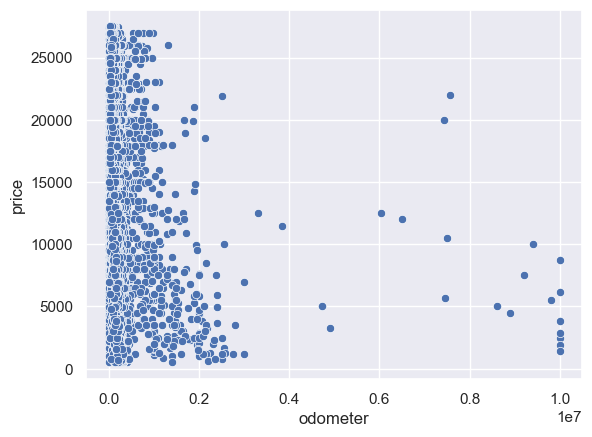

In [22]:
ax = sns.scatterplot(x="odometer", y="price", data=df)

In [23]:
df["odometer"].max()

10000000.0

In [ ]:
df.drop(df[df["odometer"]==64809218.0].index,inplace=True)

In [ ]:
df.drop(df[df["odometer"]==0.0].index,inplace=True)

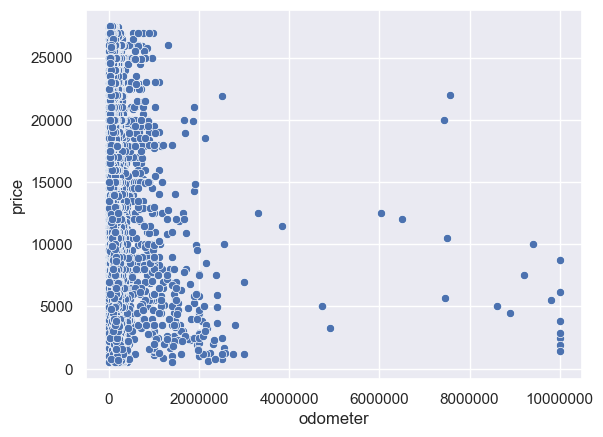

In [24]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [25]:
df["odometer"].isna().sum()

117593

In [ ]:
# Here the values above 3000000  can be considered as outliers

In [26]:
df=df[(df.odometer < 3000000)]

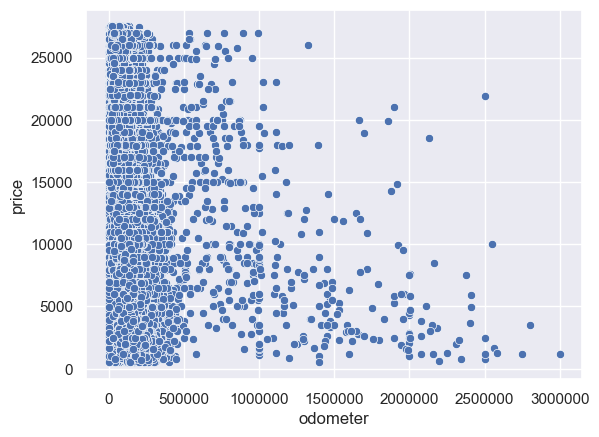

In [27]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [ ]:
df["odometer"].isna().sum()

0

In [28]:
df["year"].isna().sum()

471

In [29]:
 # The null values in a year column cannot be replaced so it is eliminated

In [30]:
df["year"].min()

1901.0

In [31]:
 # we must alo drop this 0 values

In [32]:
df.drop(df[df["year"]==0.0].index,inplace=True)

In [33]:
df=df.dropna(subset=['year'])

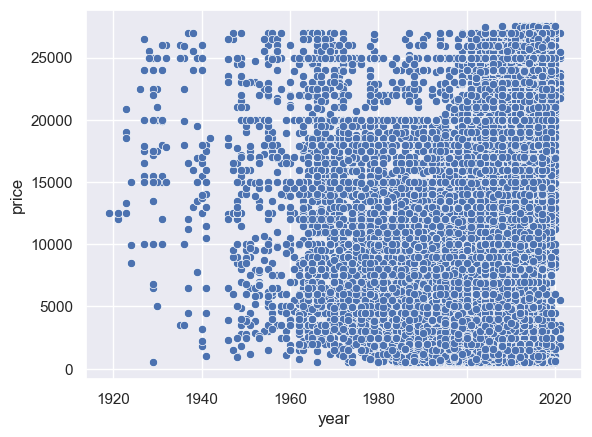

In [ ]:
bx = sns.scatterplot(x="year", y="price", data=df)

In [ ]:
df=df[(df.year > 1940)]

# Handling Null Values

In [34]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,13019700,63.638
condition,7802800,38.139
cylinders,6578400,32.154
paint_color,4893400,23.918
drive,4733900,23.138
type,3912100,19.122
manufacturer,636500,3.111
model,159200,0.778
fuel,151100,0.739
title_status,117800,0.576


In [35]:
df.condition.value_counts()

condition
excellent    61006
good         48806
like new     11281
fair          4822
new            338
salvage        310
Name: count, dtype: int64

In [36]:
# The misssing values in the condition can be found using odometer as mileage affects condition of car.
# The finding here is mean value of odometer readings grouping by there conditions is done below


In [37]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [38]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 84932.07
Excellent average odometer: 111527.87
Good average odometer: 121109.82
Fair average odometer: 182027.52
Salvage average odometer: 166510.02


In [39]:
# The above result are mean values regarding each condition.

In [40]:
# now these can be used to group the odometer readings which have nan values in condition.

In [ ]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

In [41]:
# The values are being filled by the values from above calculated mean value ranges

In [42]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [43]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,13019700,63.638
cylinders,6578400,32.154
paint_color,4893400,23.918
drive,4733900,23.138
type,3912100,19.122
manufacturer,636500,3.111
model,159200,0.778
fuel,151100,0.739
title_status,117800,0.576
transmission,86500,0.423


In [ ]:
#  drop the null values with less then 5% nan.

In [44]:
df=df.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])

In [ ]:
# droping the columns with more then 30% null values.
# but cylinders can be important feature .

In [45]:
df=df.drop(["size"],axis=1)

In [46]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
cylinders,6195800,31.954
paint_color,4628100,23.869
drive,4443500,22.917
type,3680200,18.980
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000


In [47]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')

C:\Users\anava\AppData\Local\Temp\ipykernel_12340\1014551383.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['paint_color'] = df['paint_color'].fillna(method='ffill')
C:\Users\anava\AppData\Local\Temp\ipykernel_12340\1014551383.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['drive'] = df['drive'].fillna(method='ffill')


In [48]:
df['type'] = df['type'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')

C:\Users\anava\AppData\Local\Temp\ipykernel_12340\528116914.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['type'] = df['type'].fillna(method='ffill')
C:\Users\anava\AppData\Local\Temp\ipykernel_12340\528116914.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['cylinders'] = df['cylinders'].fillna(method='ffill')


In [54]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            3
paint_color     0
state           0
dtype: int64

In [50]:
df=df.dropna(subset=['cylinders','drive'])

In [51]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            3
paint_color     0
state           0
dtype: int64

In [55]:
from scipy import stats

c:\Users\anava\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anava\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anava\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


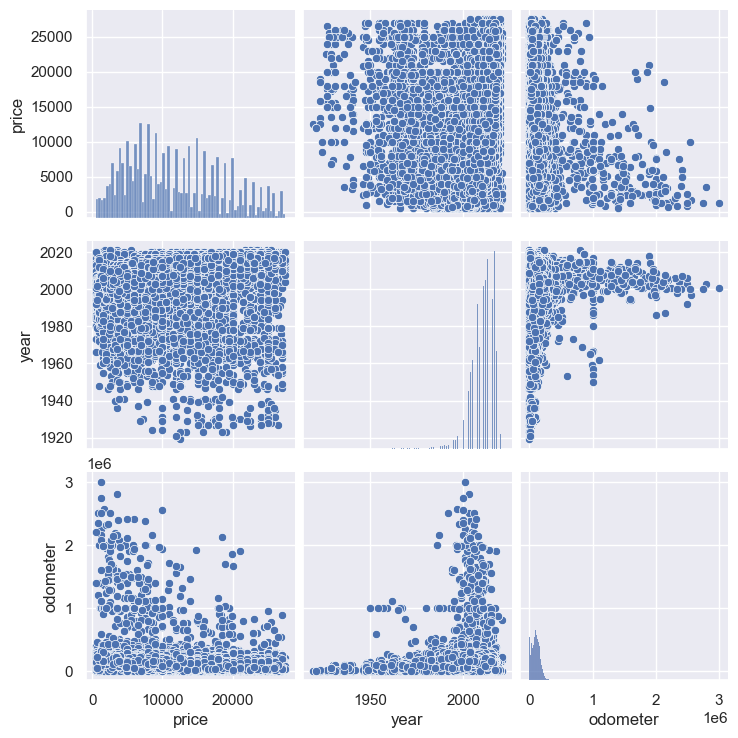

In [56]:
sns.pairplot(df)

In [ ]:
# The above were relation between numerical values of the table.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193898 entries, 0 to 423856
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         193898 non-null  int64  
 1   year          193898 non-null  float64
 2   manufacturer  193898 non-null  object 
 3   model         193898 non-null  object 
 4   condition     193898 non-null  object 
 5   cylinders     193898 non-null  object 
 6   fuel          193898 non-null  object 
 7   odometer      193898 non-null  float64
 8   title_status  193898 non-null  object 
 9   transmission  193898 non-null  object 
 10  drive         193898 non-null  object 
 11  type          193895 non-null  object 
 12  paint_color   193898 non-null  object 
 13  state         193898 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 22.2+ MB


In [58]:
c=df.columns
for i in c:
    print(df[i].value_counts())

price
7995     2598
8995     2527
6995     2393
9995     2374
5995     2243
         ... 
21669       1
19932       1
16425       1
8304        1
9584        1
Name: count, Length: 8921, dtype: int64
year
2017.0    15432
2013.0    14767
2014.0    13879
2012.0    13173
2011.0    12708
          ...  
1932.0        2
1919.0        1
1926.0        1
1933.0        1
1942.0        1
Name: count, Length: 96, dtype: int64
manufacturer
ford               33375
chevrolet          26808
toyota             16743
honda              13700
nissan             12313
jeep                8545
dodge               7639
gmc                 6511
hyundai             6445
subaru              6105
volkswagen          5318
bmw                 5190
kia                 5127
ram                 4494
mercedes-benz       4106
chrysler            4091
buick               3262
mazda               3023
cadillac            2764
lexus               2632
audi                2071
acura               2001
lincoln           

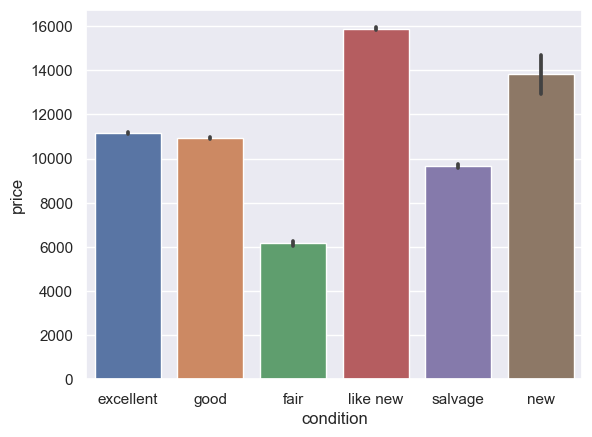

In [59]:
ax = sns.barplot(x="condition", y="price", data=df)

In [ ]:
# From above graph it is Clear that vehicles with condition new has highest price as one expects.

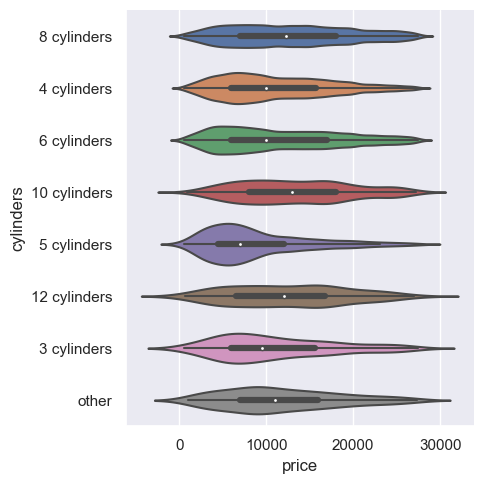

In [60]:
sns.catplot(y="cylinders", x="price",kind = "violin", data=df)

In [ ]:
# This violinplot provides clear idea about the distribution of number of cylinders and the price.

c:\Users\anava\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anava\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anava\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anava\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: F

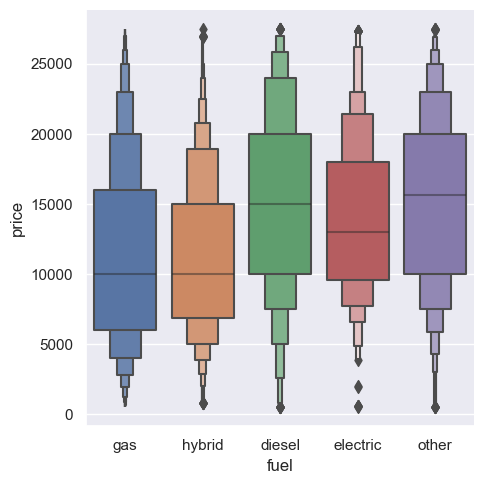

In [61]:
sns.catplot(x="fuel", y="price", kind="boxen",
            data=df)

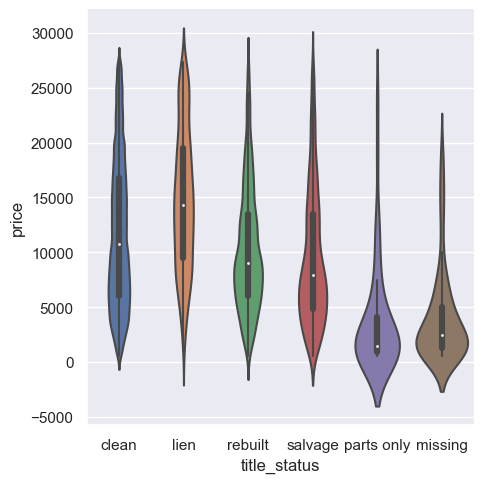

In [62]:
sns.catplot(x="title_status", y="price",kind="violin", data=df)

In [ ]:
# The distribution of price of cars based on title_status can be seen here.

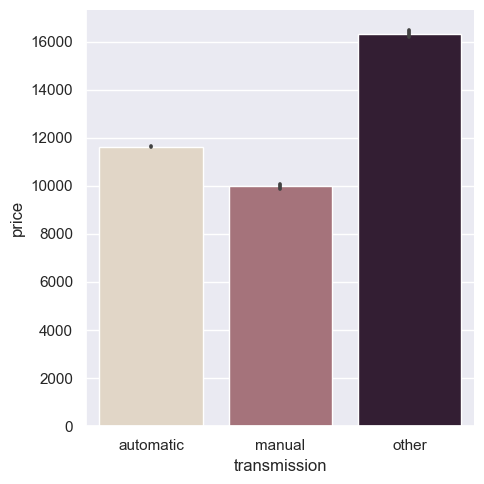

In [63]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df)

In [ ]:
# The relation between price and transmission.

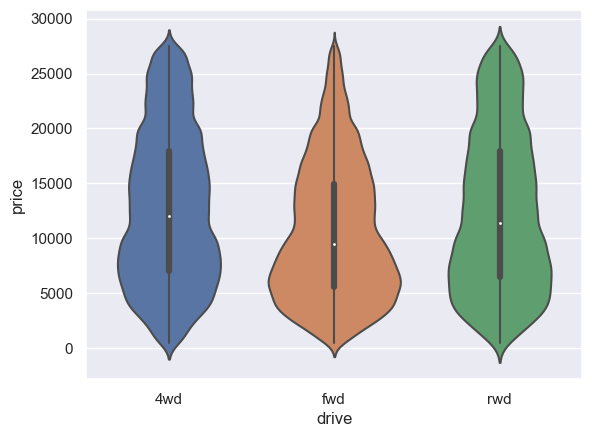

In [64]:
sns.violinplot(x=df.drive, y=df.price);

In [ ]:
# There doesnt seem too be much difference between the first 2 types of drives .

# The third one is a bit different.

c:\Users\anava\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anava\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anava\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anava\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: F

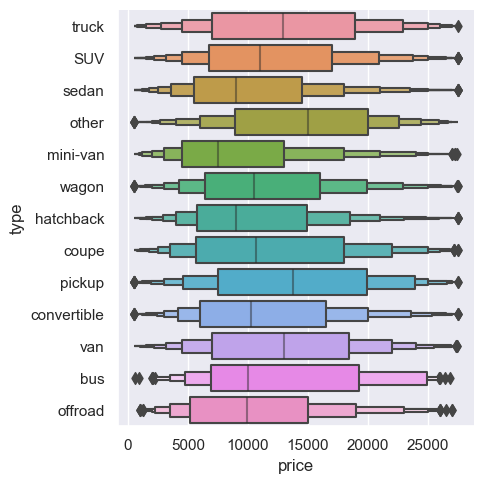

In [65]:
sns.catplot(y="type", x="price",kind="boxen", data=df);

In [66]:
# Important observation can be obtained from the above figure regarding the price bracket for each type of vehicle.

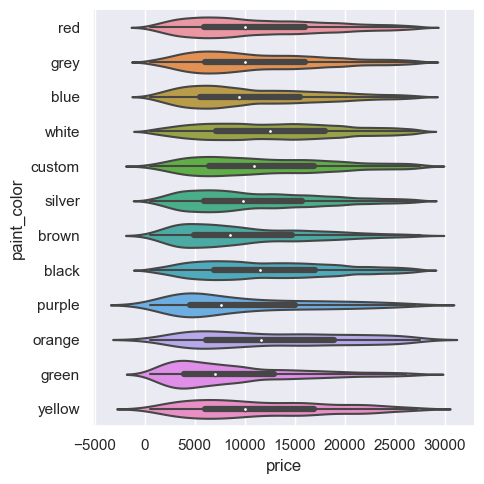

In [67]:
sns.catplot(y="paint_color", x="price",kind="violin", data=df);

In [ ]:
# Important observation can be obtained from the above figure regarding the distribution of price bracket for each color of vehicle.

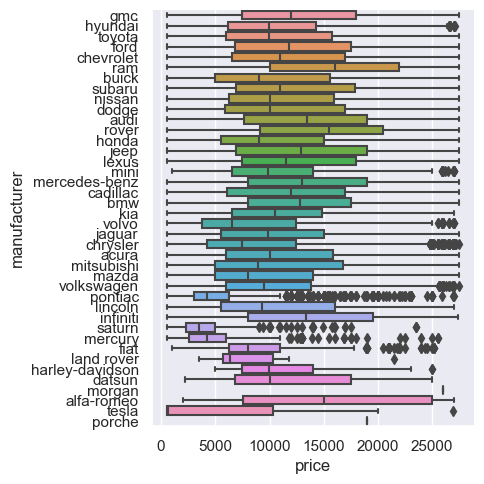

In [68]:
sns.catplot(y="manufacturer", x="price",kind="box", data=df);

In [ ]:
# It just gives and idea about prices based on the manufacturer.

#  Label Processing

In [69]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [70]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [81]:
df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

# Split Train and Test data

In [82]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [83]:
y= df.price
X= df.drop('price',axis=1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(155118, 13) (155118,)
(38780, 13) (38780,)


In [78]:
# Training Model

# Random Forest

In [86]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [87]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [88]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)

Mean Absolute Error: 1745.68
Mean Squared Error: 7530072.18
Root Mean Squared Error: 2744.1
83.11028109774625
